# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Daffa Albari
- Email: daffaa.albari@outlook.com
- Id Dicoding: dududada

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import pickle

### Menyiapkan data yang akan diguankan

In [4]:
df = pd.read_csv('./data/data.csv', delimiter=';')

df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

**Insigt**: Dataset terdiri dari 37 kolom dengan masing-masing kolom memiliki tipe data yang berbeda-beda. Lalu, jumlah baris pada dataset ini berjumlah 4424 baris.

In [6]:
# Cek missing values
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


**Insight**: Tidak terdapat missing value pada dataset ini.

In [7]:
# Cek duplikat data
df.duplicated().sum()

0

**Insisht**: Tidak terdapat kolom yang memiliki nilai yang sama pada setiap barisnya.

In [8]:
# melihat distribusi data pada kolom target
df['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

#### Melakukan Exploratory Data Analysis (EDA)

In [9]:
categorical_columns = [
    'Marital_status',
    'Application_mode',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'International'
]

In [10]:
numerical_columns = [
    'Application_order',
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    "Curricular_units_1st_sem_credited",
    "Curricular_units_1st_sem_enrolled",
    "Curricular_units_1st_sem_evaluations",          
    "Curricular_units_1st_sem_approved",
    "Curricular_units_1st_sem_grade",
    "Curricular_units_1st_sem_without_evaluations",   
    "Curricular_units_2nd_sem_credited",
    "Curricular_units_2nd_sem_enrolled",
    "Curricular_units_2nd_sem_evaluations",           
    "Curricular_units_2nd_sem_approved",
    "Curricular_units_2nd_sem_grade",
    "Curricular_units_2nd_sem_without_evaluations",  
    "Unemployment_rate",
    "Inflation_rate",
    "GDP"
]

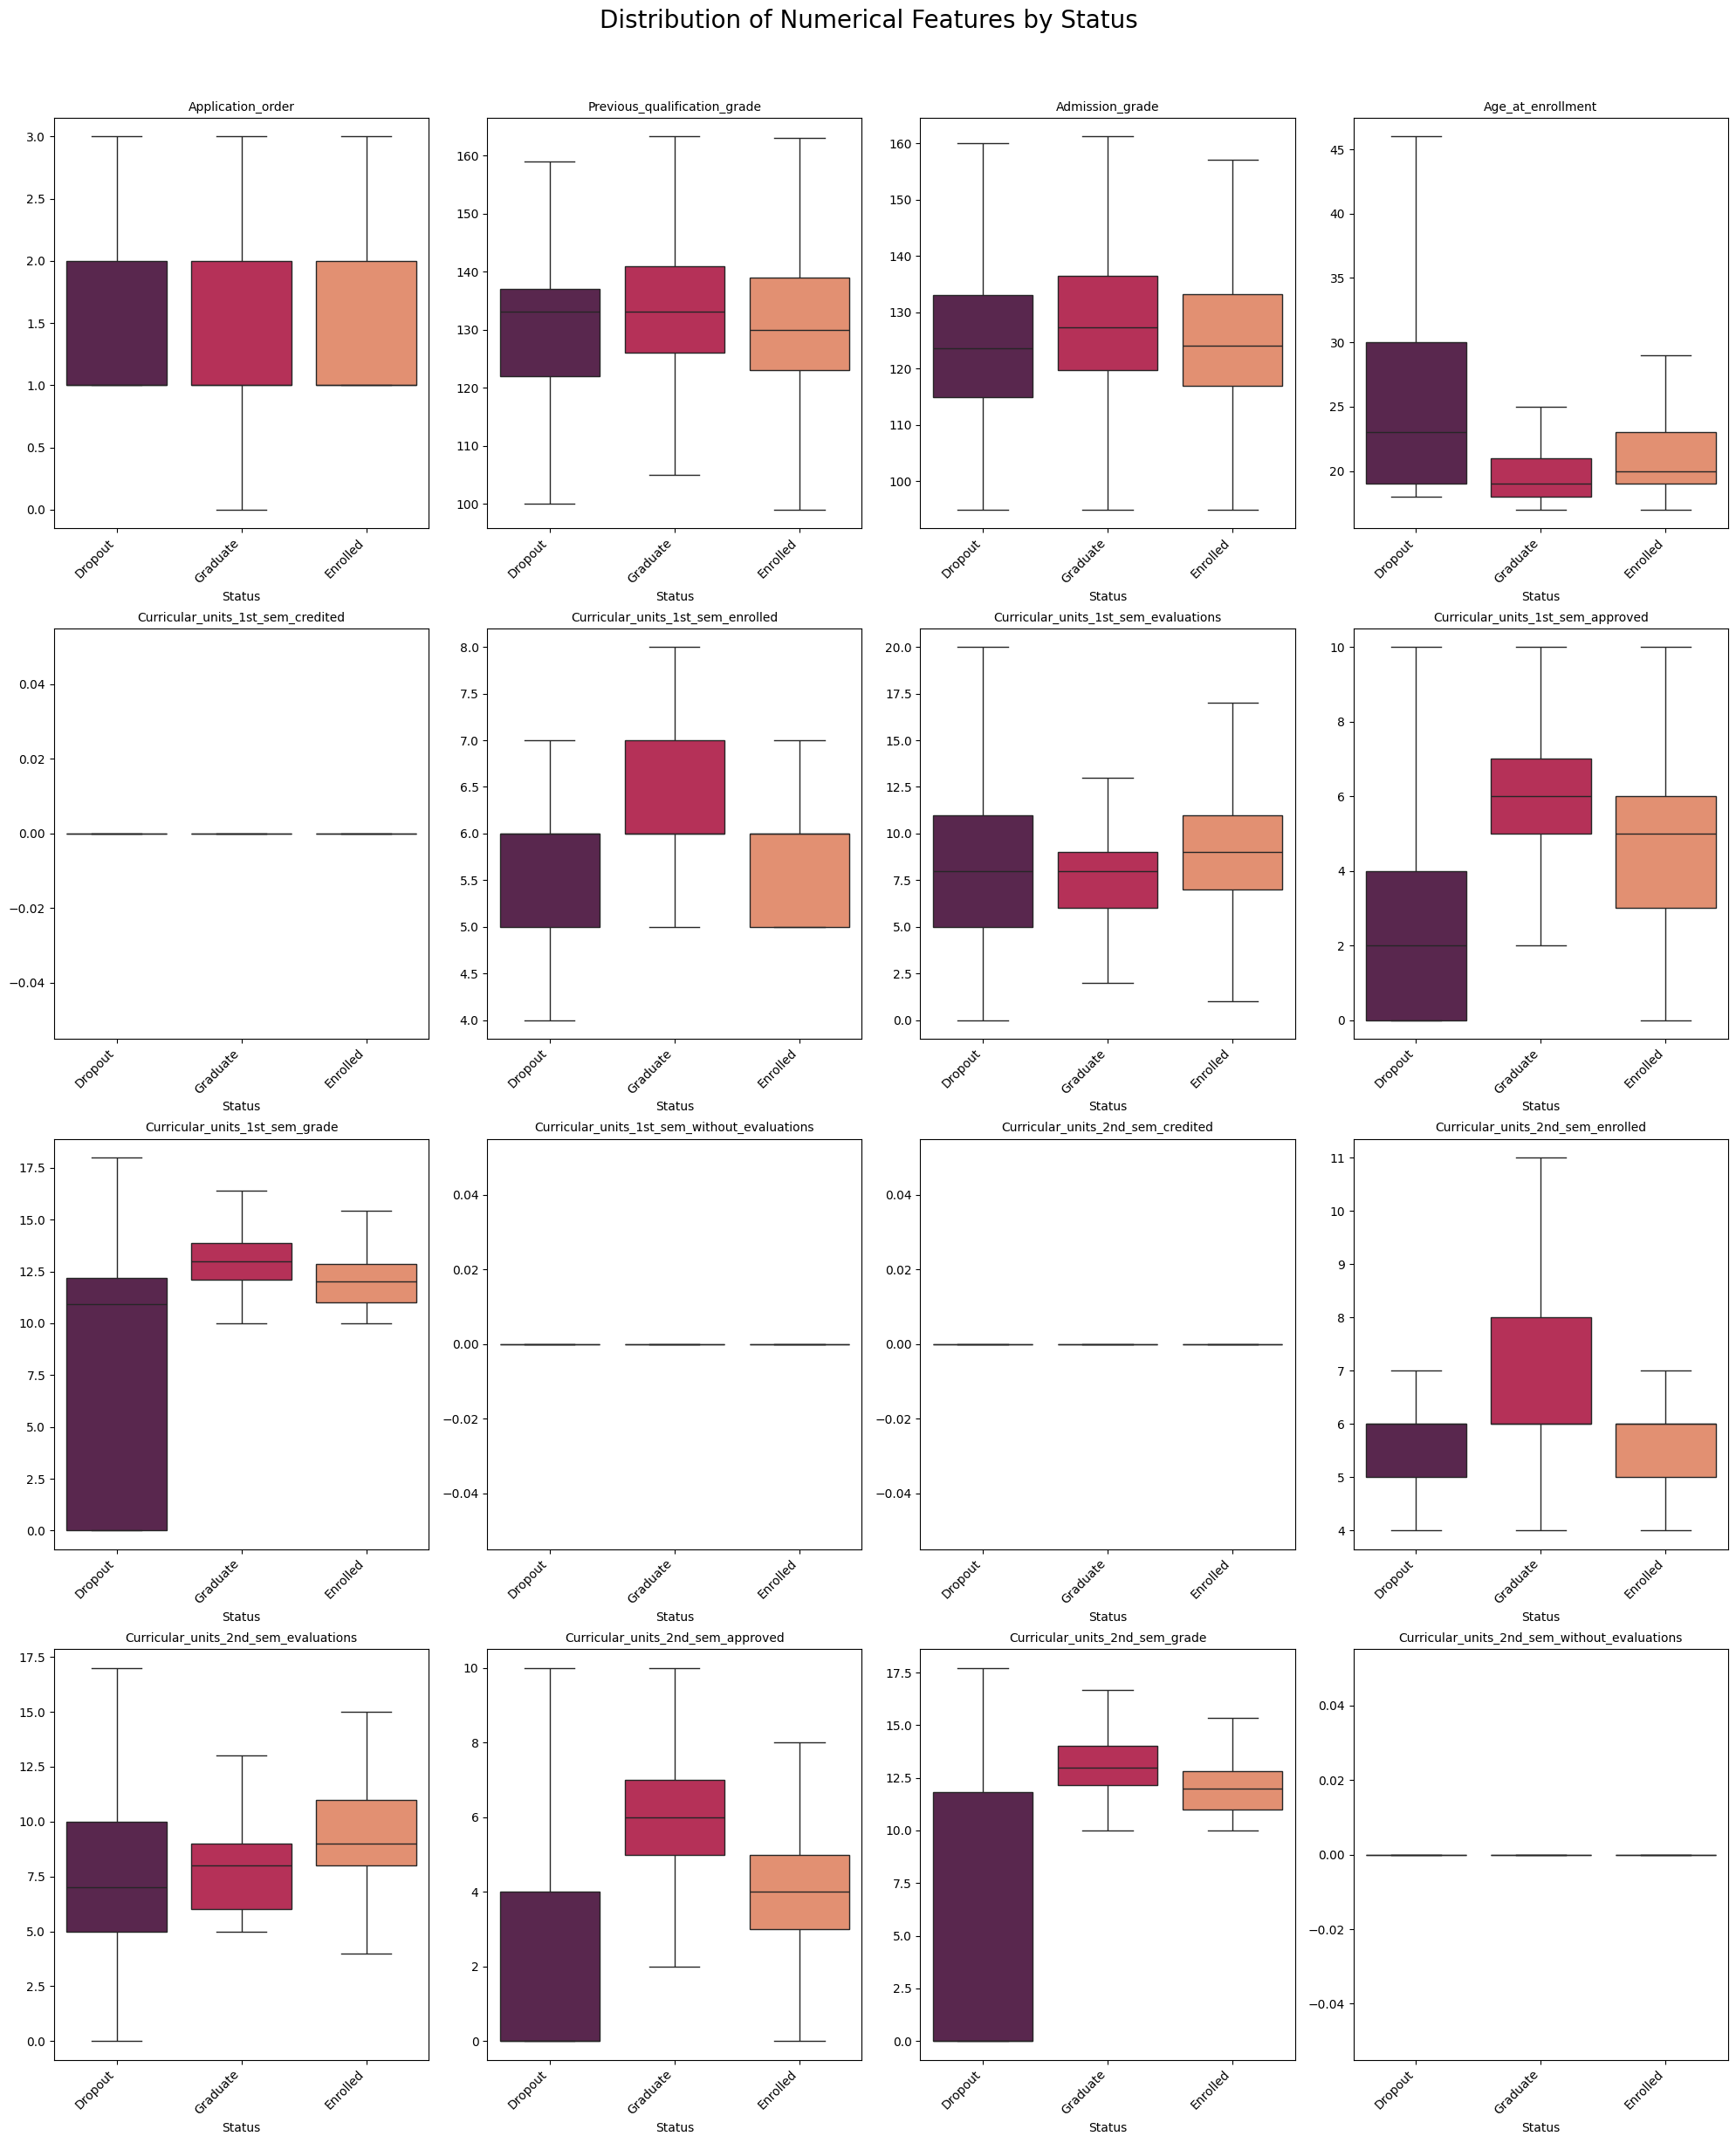

In [11]:
nrows, ncols = 4, 4  # Bisa disesuaikan
total_plots = nrows * ncols

# Periksa apakah ada kolom numerik
if not numerical_columns:
    print("Tidak ada kolom numerik yang tersedia untuk divisualisasikan.")
else:
    # Buat subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 25))  # Ukuran lebih besar untuk visibilitas
    fig.suptitle('Distribution of Numerical Features by Status', fontsize=20)

    # Loop untuk membuat boxplot pada masing-masing kolom numerik
    for ax, var in zip(axes.flatten(), numerical_columns):
        if var in df.columns and df[var].notna().any():  # Pastikan kolom ada di DataFrame dan tidak kosong
            sns.boxplot(data=df, y=var, x='Status', ax=ax, palette='rocket', showfliers=False)
            ax.set_title(var, fontsize=10)
            ax.set_xlabel('Status', fontsize=10)
            ax.set_ylabel('')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Hapus sumbu yang tidak terpakai
    if len(numerical_columns) < len(axes.flatten()):
        for ax in axes.flatten()[len(numerical_columns):]:
            ax.remove()

    plt.tight_layout()
    plt.subplots_adjust(top=0.93)  # Memberi ruang untuk judul
    plt.show()

In [12]:
df['Status'] = df['Status'].map({'Graduate': 1, 'Enrolled': 1, 'Dropout': 0})

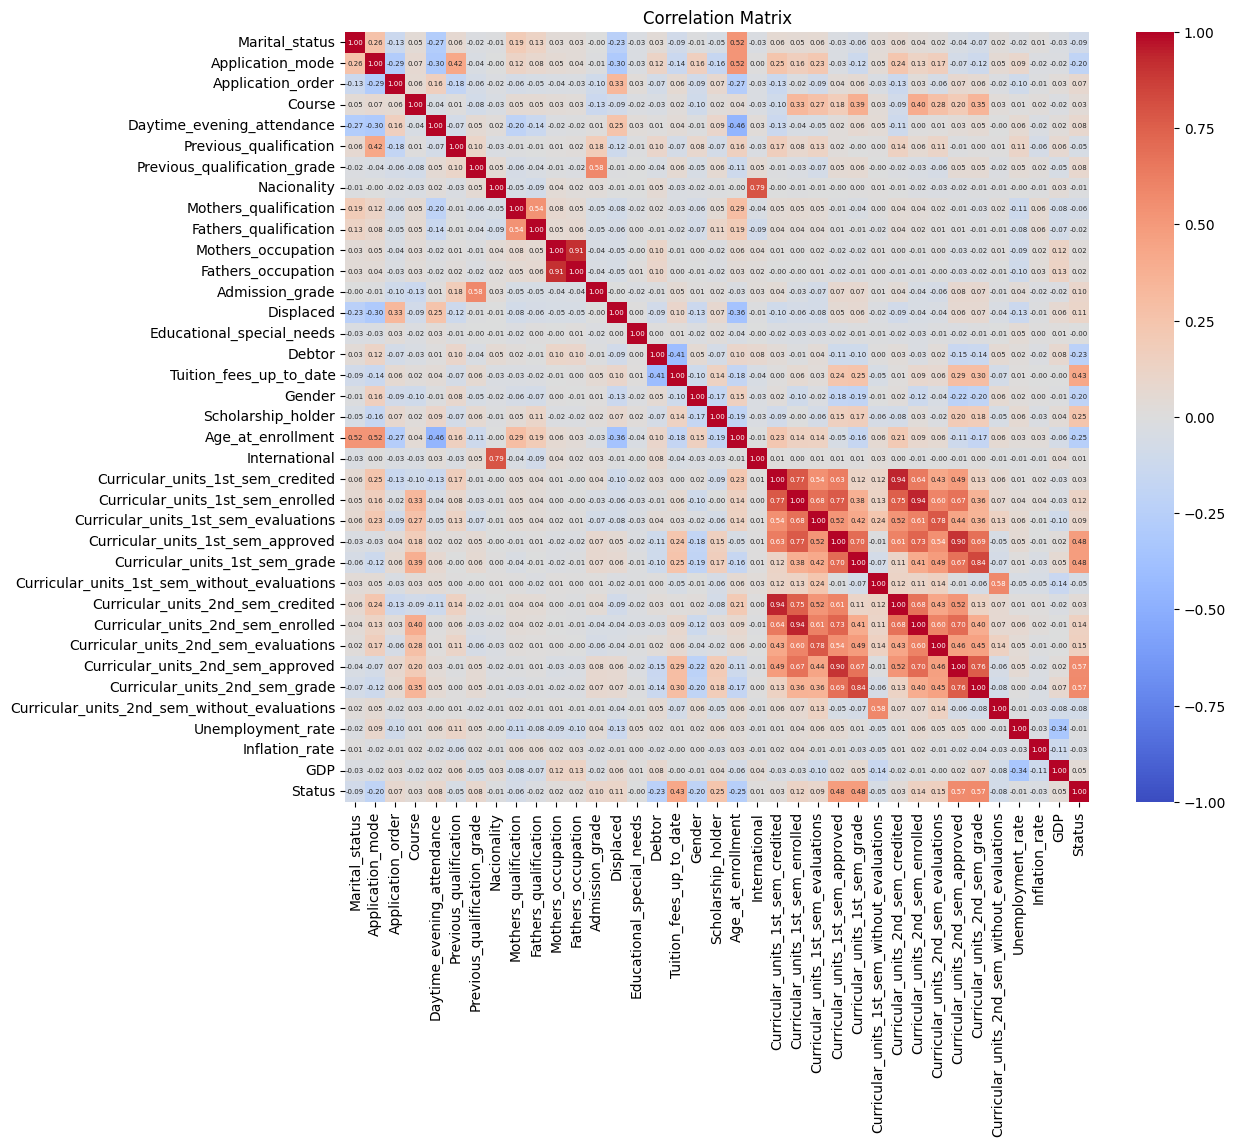

In [13]:
# Korelasi antar kolom numerik
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f", annot_kws={"size": 5})
plt.title('Correlation Matrix')
plt.show()

In [14]:
print(correlation_matrix['Status'].sort_values(ascending=False))

Status                                          1.000000
Curricular_units_2nd_sem_grade                  0.571792
Curricular_units_2nd_sem_approved               0.569500
Curricular_units_1st_sem_grade                  0.480669
Curricular_units_1st_sem_approved               0.479112
Tuition_fees_up_to_date                         0.429149
Scholarship_holder                              0.245354
Curricular_units_2nd_sem_evaluations            0.154999
Curricular_units_2nd_sem_enrolled               0.141515
Curricular_units_1st_sem_enrolled               0.124635
Displaced                                       0.107232
Admission_grade                                 0.095806
Curricular_units_1st_sem_evaluations            0.090125
Daytime_evening_attendance                      0.080499
Previous_qualification_grade                    0.078208
Application_order                               0.070485
GDP                                             0.046319
Course                         

**🔍 1. Faktor yang memiliki korelasi positif kuat terhadap Status**

**📘Insight Utama**
1. Kinerja akademik di awal perkuliahan (semester 1 dan 2) berperan besar dalam menentukan status akhir mahasiswa. Mahasiswa dengan nilai yang lebih baik dan mata kuliah yang diselesaikan di semester awal memiliki peluang lebih besar untuk lulus.
2. Kedisiplinan dalam pembayaran biaya kuliah juga memengaruhi status mahasiswa. Ini mungkin disebabkan oleh masalah keuangan yang berdampak pada kemampuan mereka melanjutkan studi.
3. Mahasiswa penerima beasiswa memiliki kemungkinan lebih besar untuk lulus. Hal ini bisa disebabkan oleh motivasi tambahan, dukungan finansial, atau proses seleksi yang lebih ketat saat mendapatkan beasiswa.

**🔍 2. Faktor yang memiliki korelasi negatif terhadap Status**

**📘 Insight Utama**
1. Usia saat pendaftaran memainkan peran penting dalam menentukan dropout. Mahasiswa yang lebih tua (mungkin pekerja profesional atau mahasiswa non-reguler) lebih mungkin untuk keluar dari studi.
2. Utang atau tunggakan biaya kuliah secara signifikan berdampak negatif terhadap status mahasiswa. Hal ini masuk akal, karena masalah keuangan dapat mendorong mahasiswa untuk meninggalkan studi.
3. Gender memiliki korelasi negatif (-0.20), yang mungkin menunjukkan bahwa ada perbedaan gender dalam tingkat dropout. Jika "Gender" dikodekan sebagai 0 (laki-laki) dan 1 (perempuan), korelasi negatif ini dapat mengindikasikan bahwa laki-laki memiliki kemungkinan dropout yang lebih tinggi.
4. Mode pendaftaran (Application_mode) mungkin berkaitan dengan jenis jalur masuk. Misalnya, mahasiswa yang masuk melalui jalur reguler mungkin memiliki peluang lebih baik untuk bertahan dibandingkan jalur non-reguler (misalnya, jalur transfer atau khusus).
5. Jumlah mata kuliah tanpa evaluasi berkaitan negatif dengan status. Jika seorang mahasiswa tidak menghadiri evaluasi atau ujian, mereka mungkin akan lebih mungkin dropout.

#### Analisis Data Kategorikal

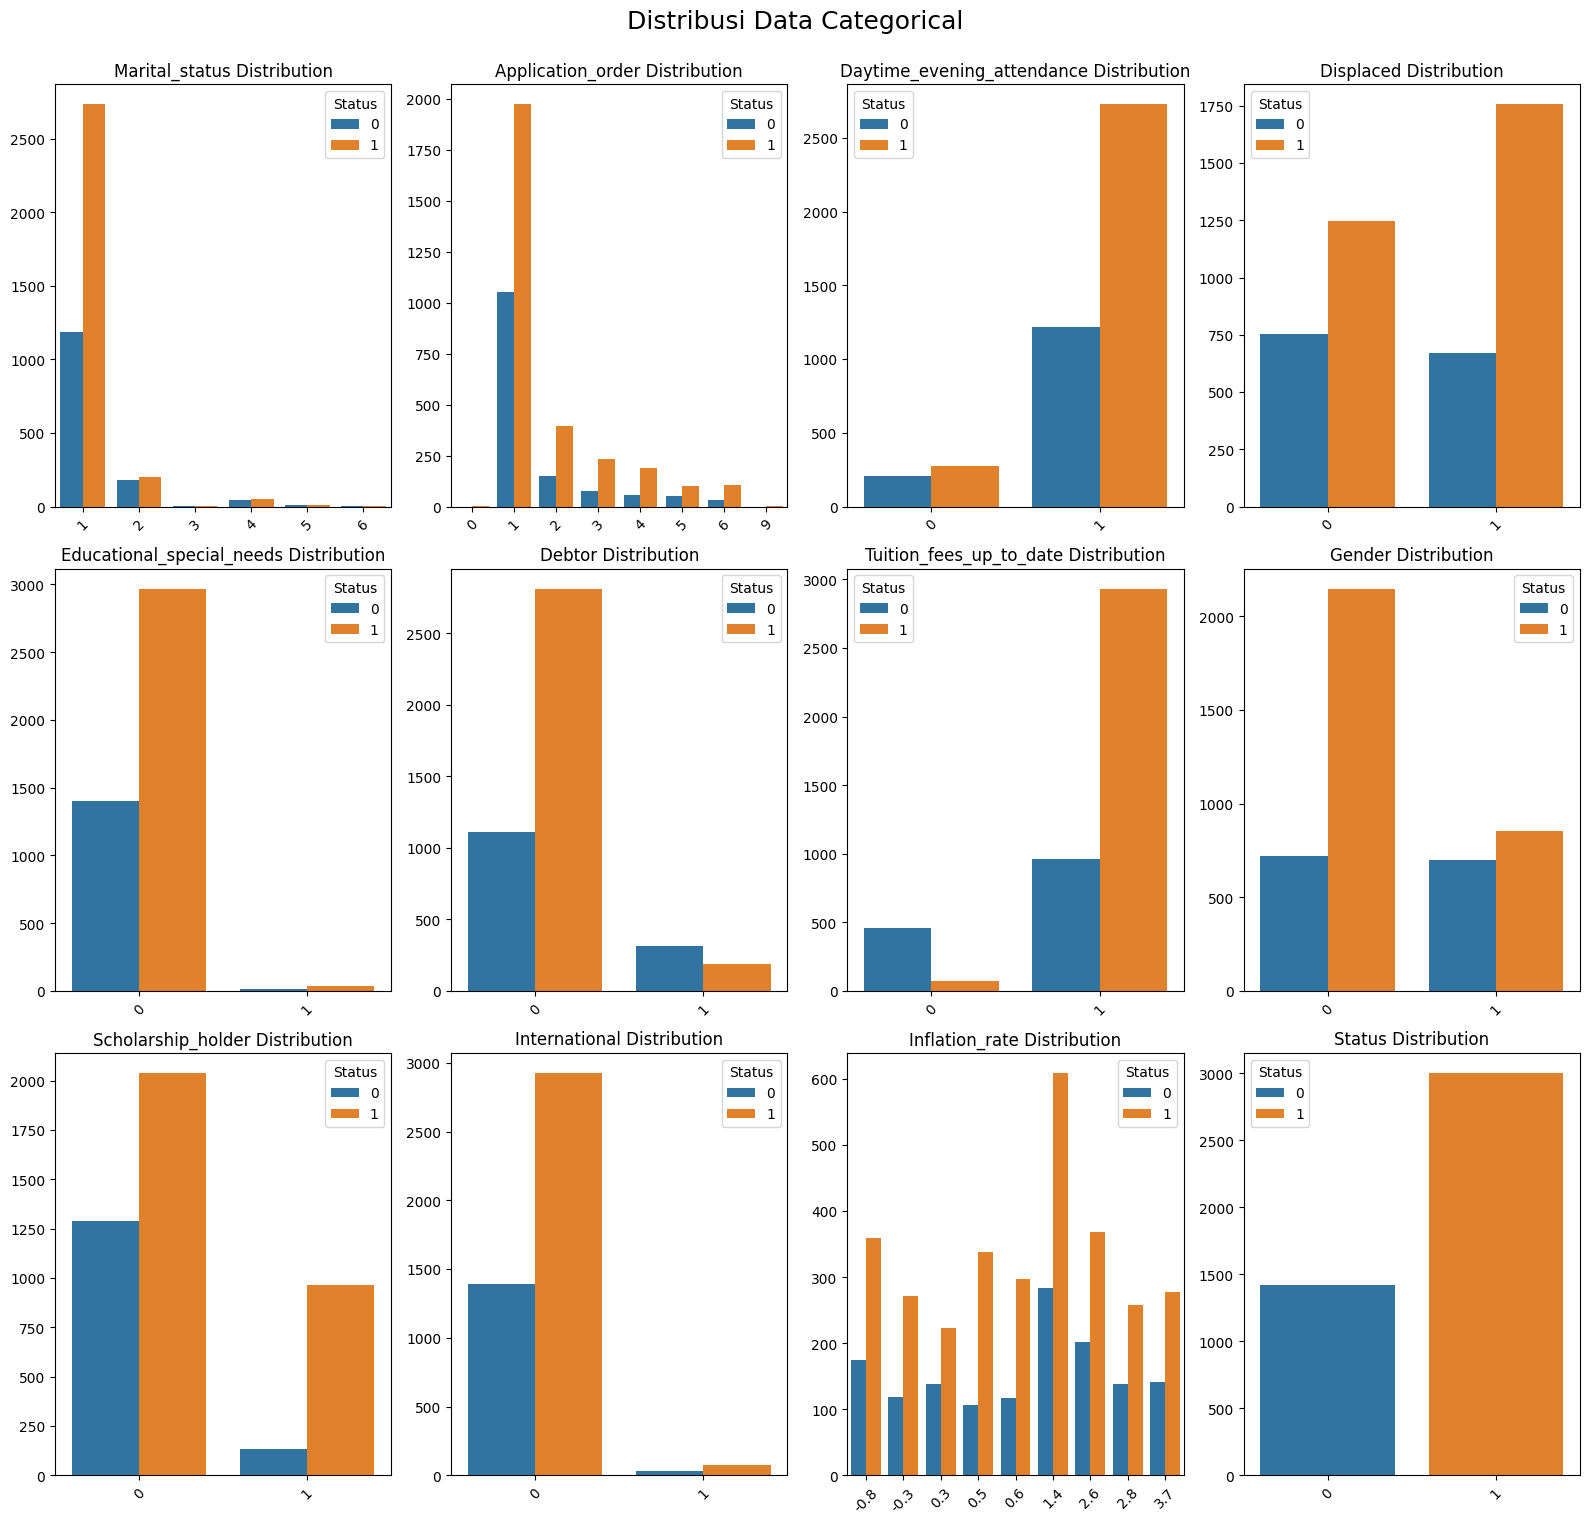

In [15]:
# Pilih kolom kategorikal
categorical_plot = df.select_dtypes(include=['object', 'category']).columns.tolist()
small_unique_numerical = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if df[col].nunique() < 10]
categorical_plot.extend(small_unique_numerical)

# Periksa apakah ada kolom kategorikal
if not categorical_plot:
    print("Tidak ada kolom kategorikal yang tersedia untuk divisualisasikan.")
else:
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 25))
    fig.suptitle('Distribusi Data Categorical', fontsize=18)

    for ax, var in zip(axes.flatten(), categorical_plot):
        sns.countplot(data=df[df[var].notna()], x=var, ax=ax, hue='Status')
        ax.set_title(f'{var} Distribution')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    for ax in axes.flatten()[len(categorical_plot):]:
        ax.remove()

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

Visualisasi di atas memberikan beberapa wawasan tentang distribusi data kategorikal dalam dataset:

1. **Marital Status**: Semakin banyak individu dengan status "1" daripada "0" di hampir semua kategori perkawinan, kecuali satu.

2. **Application Order**: Mayoritas aplikasi berada pada urutan awal, dan individu dengan status "1" lebih dominan di semua urutan aplikasi.

3. **Daytime/Evening Attendance**: Lebih banyak individu dengan status "1" yang hadir pada siang hari dibandingkan malam hari.

4. **Displaced**: Lebih banyak individu dengan status "1" yang tidak berada di kondisi "displaced".

5. **Educational Special Needs**: Individu dengan status "1" yang tidak memiliki kebutuhan khusus lebih banyak.

6. **Debtor**: Individu dengan status "1" lebih banyak ditemukan pada kondisi tanpa hutang.

7. **Tuition Fees Up-to-Date**: Sebagian besar individu yang mempunyai status "1" memiliki pembayaran kuliah yang tertunda.

8. **Gender**: Terdapat keragaman gender, tetapi individu dengan status "1" lebih dominan pada kategori tertentu.

9. **Scholarship Holder**: Banyak individu dengan status "1" yang tidak mendapatkan beasiswa.

10. **International**: Kebanyakan individu dengan status "1" merupakan pelajar lokal, bukan internasional.

11. **Inflation Rate**: Tidak ada pola jelas, namun ada variasi dalam jumlah individu terhadap tingkat inflasi.


Dari grafik ini, kita bisa mengidentifikasi faktor-faktor yang mungkin berhubungan dengan status tertentu dan dapat dijadikan bahan analisis lebih lanjut atau pengambilan keputusan.

## Data Preparation / Preprocessing

In [16]:
# menghapus kolom dengan korelasi rendah
threshold = 0.05

low_correlation = correlation_matrix['Status'][correlation_matrix['Status'].abs() < threshold].index

print(f"Kolom dengan korelasi rendah: {low_correlation}")

df_new = df.drop(low_correlation, axis=1)
df_new.head()

Kolom dengan korelasi rendah: Index(['Course', 'Previous_qualification', 'Nacionality',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Educational_special_needs', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_2nd_sem_credited', 'Unemployment_rate',
       'Inflation_rate', 'GDP'],
      dtype='object')


,Marital_status,Application_mode,Application_order,Daytime_evening_attendance,Previous_qualification_grade,Mothers_qualification,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,...,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,5,1,122.0,19,127.3,1,0,1,...,0,0,0.000000,0,0,0,0,0.000000,0,0
1,1,15,1,1,160.0,1,142.5,1,0,0,...,6,6,14.000000,0,6,6,6,13.666667,0,1
2,1,1,5,1,122.0,37,124.8,1,0,0,...,0,0,0.000000,0,6,0,0,0.000000,0,0
3,1,17,2,1,122.0,38,119.6,1,0,1,...,8,6,13.428571,0,6,10,5,12.400000,0,1
4,2,39,1,0,100.0,37,141.5,0,0,1,...,9,5,12.333333,0,6,6,6,13.000000,0,1


In [17]:
df_new.columns

Index(['Marital_status', 'Application_mode', 'Application_order',
       'Daytime_evening_attendance', 'Previous_qualification_grade',
       'Mothers_qualification', 'Admission_grade', 'Displaced', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Status'],
      dtype='object')

In [18]:
df_analysis = df_new.copy()

In [19]:
# Misalkan dataset Anda sudah berada dalam dataframe df_new
df_analysis['Marital_status'] = df_analysis['Marital_status'].replace({
    1: 'single', 2: 'married', 3: 'widower', 4: 'divorced',
    5: 'facto union', 6: 'legally separated'
})

df_analysis['Daytime_evening_attendance'] = df_analysis['Daytime_evening_attendance'].replace({
    1: 'daytime', 0: 'evening'
})

df_analysis['Displaced'] = df_analysis['Displaced'].replace({1: 'yes', 0: 'no'})
df_analysis['Debtor'] = df_analysis['Debtor'].replace({1: 'yes', 0: 'no'})
df_analysis['Tuition_fees_up_to_date'] = df_analysis['Tuition_fees_up_to_date'].replace({1: 'yes', 0: 'no'})
df_analysis['Gender'] = df_analysis['Gender'].replace({1: 'male', 0: 'female'})
df_analysis['Scholarship_holder'] = df_analysis['Scholarship_holder'].replace({1: 'yes', 0: 'no'})

In [20]:
df_analysis.head()

,Marital_status,Application_mode,Application_order,Daytime_evening_attendance,Previous_qualification_grade,Mothers_qualification,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,...,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,single,17,5,daytime,122.0,19,127.3,yes,no,yes,...,0,0,0.000000,0,0,0,0,0.000000,0,0
1,single,15,1,daytime,160.0,1,142.5,yes,no,no,...,6,6,14.000000,0,6,6,6,13.666667,0,1
2,single,1,5,daytime,122.0,37,124.8,yes,no,no,...,0,0,0.000000,0,6,0,0,0.000000,0,0
3,single,17,2,daytime,122.0,38,119.6,yes,no,yes,...,8,6,13.428571,0,6,10,5,12.400000,0,1
4,married,39,1,evening,100.0,37,141.5,no,no,yes,...,9,5,12.333333,0,6,6,6,13.000000,0,1


In [48]:
df_analysis.columns

Index(['Marital_status', 'Application_mode', 'Application_order',
       'Daytime_evening_attendance', 'Previous_qualification_grade',
       'Mothers_qualification', 'Admission_grade', 'Displaced', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Status'],
      dtype='object')

In [21]:
X = df_new.drop('Status', axis=1)
y = df_new['Status']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Gabungkan hasilnya kembali menjadi dataframe
df_smote = pd.DataFrame(X_resampled, columns=X.columns)
df_smote['Status'] = y_resampled

# Periksa hasilnya
print(df_smote['Status'].value_counts())

Status
0    3003
1    3003
Name: count, dtype: int64


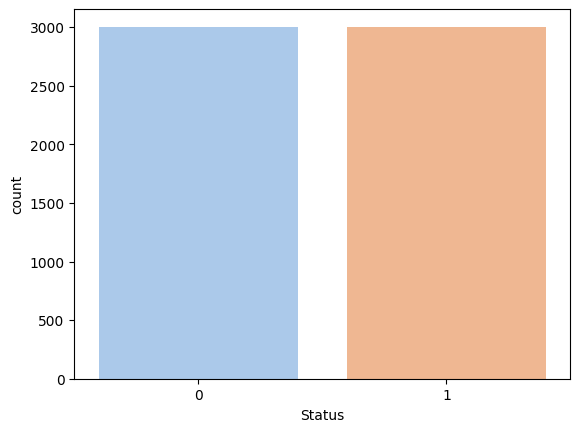

In [22]:
colors = sns.color_palette("pastel", len(df_smote['Status'].unique()))

sns.countplot(data=df_smote, x='Status', palette=colors)
plt.show()

In [23]:
df_smote.head(2)

,Marital_status,Application_mode,Application_order,Daytime_evening_attendance,Previous_qualification_grade,Mothers_qualification,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,...,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,5,1,122.0,19,127.3,1,0,1,...,0,0,0.0,0,0,0,0,0.000000,0,0
1,1,15,1,1,160.0,1,142.5,1,0,0,...,6,6,14.0,0,6,6,6,13.666667,0,1


In [24]:
df_smote['Status'].value_counts()

Status
0    3003
1    3003
Name: count, dtype: int64

In [25]:
df_sclaed = df_smote.copy()

df_sclaed.head()

,Marital_status,Application_mode,Application_order,Daytime_evening_attendance,Previous_qualification_grade,Mothers_qualification,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,...,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,5,1,122.0,19,127.3,1,0,1,...,0,0,0.000000,0,0,0,0,0.000000,0,0
1,1,15,1,1,160.0,1,142.5,1,0,0,...,6,6,14.000000,0,6,6,6,13.666667,0,1
2,1,1,5,1,122.0,37,124.8,1,0,0,...,0,0,0.000000,0,6,0,0,0.000000,0,0
3,1,17,2,1,122.0,38,119.6,1,0,1,...,8,6,13.428571,0,6,10,5,12.400000,0,1
4,2,39,1,0,100.0,37,141.5,0,0,1,...,9,5,12.333333,0,6,6,6,13.000000,0,1


In [50]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Pisahkan fitur (X) dan target (y)
X = df_smote.drop('Status', axis=1)  # Menghapus kolom 'Status' dari fitur
y = df_smote['Status']  # Menyimpan kolom 'Status' sebagai target

# Terapkan standardization hanya pada kolom numerik
X_scaled = scaler.fit_transform(X)

with open('./model/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

feature_columns = X.columns.tolist()  # Ambil nama kolom dari X
with open('./model/features.pkl', 'wb') as file:
    pickle.dump(feature_columns, file)

# Jika perlu, Anda dapat menggabungkan X_scaled dan y kembali menjadi DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Status'] = y  # Menambahkan kolom 'Status' kembali

# Lihat hasil
df_scaled.head()

,Marital_status,Application_mode,Application_order,Daytime_evening_attendance,Previous_qualification_grade,Mothers_qualification,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,...,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,-0.294006,-0.169034,2.759423,0.418739,-0.796194,-0.056410,0.054301,1.053019,-0.32632,0.543097,...,-1.863279,-1.282744,-1.784538,-0.198753,-2.826127,-1.862262,-1.201475,-1.557925,-0.199273,0
1,-0.294006,-0.283619,-0.521079,0.418739,2.166948,-1.212930,1.111049,1.053019,-0.32632,-1.841291,...,-0.464073,0.622340,0.800108,-0.198753,-0.009380,-0.403731,0.743816,0.802151,-0.199273,1
2,-0.294006,-1.085713,2.759423,0.418739,-0.796194,1.100110,-0.119506,1.053019,-0.32632,-1.841291,...,-1.863279,-1.282744,-1.784538,-0.198753,-0.009380,-1.862262,-1.201475,-1.557925,-0.199273,0
3,-0.294006,-0.169034,0.299047,0.418739,-0.796194,1.164361,-0.481025,1.053019,-0.32632,0.543097,...,0.002330,0.622340,0.694612,-0.198753,-0.009380,0.568623,0.419601,0.583412,-0.199273,1
4,1.452580,1.091398,-0.521079,-2.388122,-2.511697,1.100110,1.041526,-0.949651,-0.32632,0.543097,...,0.235531,0.304826,0.492412,-0.198753,-0.009380,-0.403731,0.743816,0.687025,-0.199273,1


## Modeling

In [27]:
X_scaled = df_scaled.drop('Status', axis=1)
y_scaled = df_scaled['Status']


# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [34]:
# Membuat model
rf_model = RandomForestClassifier(random_state=42)

# Melatih model dengan data pelatihan
rf_model.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred_rf = rf_model.predict(X_test)

## Evaluation

In [35]:
# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.8810316139767055
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       586
           1       0.86      0.91      0.89       616

    accuracy                           0.88      1202
   macro avg       0.88      0.88      0.88      1202
weighted avg       0.88      0.88      0.88      1202



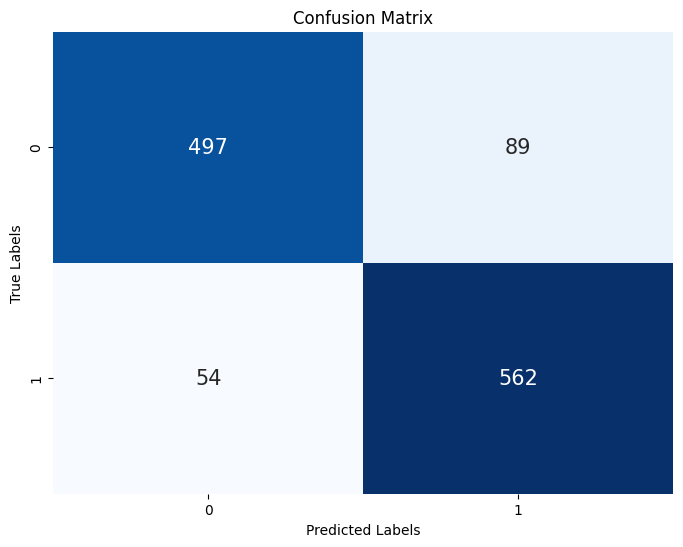

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'fontsize': 15})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Export Model

In [37]:
# Simpan model Random Forest
joblib.dump(rf_model, './model/rf_model.pkl')

['./model/rf_model.pkl']

In [41]:
with open('./model/model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

## Save to Database

In [104]:
df_analysis.to_csv('./data/data_clean.csv', index=False)

In [2]:
from sqlalchemy import create_engine
# from sqlalchemy.pool import NullPool
from dotenv import load_dotenv
import os

# Load environment variables from .env
load_dotenv()

# Fetch variables
USER = os.getenv("user")
PASSWORD = os.getenv("password")
HOST = os.getenv("host")
PORT = os.getenv("port")
DBNAME = os.getenv("dbname")

In [4]:
# Construct the SQLAlchemy connection string
DATABASE_URL = f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}?sslmode=require"

# Create the SQLAlchemy engine
engine = create_engine(DATABASE_URL)
try:
    with engine.connect() as connection:
        print("Connection successful!")
except Exception as e:
    print(f"Failed to connect: {e}")

Connection successful!


In [111]:
df_analysis.to_sql('student_performance', engine)

424